In [48]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import LabelEncoder
from sklearn.preprocessing import StandardScaler
from sklearn.linear_model import LogisticRegression
from sklearn.ensemble import RandomForestClassifier
from xgboost import XGBClassifier
from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score, classification_report, confusion_matrix, roc_curve, auc

In [49]:
df=pd.read_csv("rwsi_data.csv")
df.head()

,SessionID,AdClicks,InfoSectionCount,InfoSectionTime,HelpPageVisits,HelpPageTime,ItemBrowseCount,ItemBrowseTime,ExitRateFirstPage,SessionExitRatio,PageEngagementScore,HolidayProximityIndex,VisitMonth,UserPlatformID,WebClientCode,MarketZone,TrafficSourceCode,UserCategory,IsWeekendVisit,MonetaryConversion
0,jv3uDyqYltpoXreO,0.0,0.0,0.0,0.0,0.0,1.0,0.000000,0.20,0.20,0.0,0.0,February,Windows,Safari,North America,1.0,Returning,False,No
1,eBHG5YGyco8TRlac,4.0,0.0,0.0,0.0,0.0,2.0,64.000000,0.00,0.10,0.0,0.0,February,Android,Chrome,NaN,2.0,Returning,False,No
2,Lz5fuqr91SKGHb5N,0.0,0.0,0.0,0.0,0.0,1.0,0.000000,0.20,0.20,0.0,0.0,February,MacOS,Safari,Other,3.0,Returning,False,No
3,cyOsumxkpNEvKIdc,4.0,0.0,0.0,0.0,0.0,2.0,2.666667,0.05,0.14,0.0,0.0,February,iOS,NaN,Europe,4.0,Returning,False,No
4,F4rTMKOqtoPKzxw9,2.0,0.0,0.0,0.0,0.0,10.0,627.500000,0.02,0.05,0.0,NaN,February,iOS,Internet Explorer,NaN,4.0,Returning,True,No


In [50]:
df.shape

(12330, 20)

In [51]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 12330 entries, 0 to 12329
Data columns (total 20 columns):
 #   Column                 Non-Null Count  Dtype  
---  ------                 --------------  -----  
 0   SessionID              12330 non-null  object 
 1   AdClicks               11467 non-null  float64
 2   InfoSectionCount       11961 non-null  float64
 3   InfoSectionTime        11961 non-null  float64
 4   HelpPageVisits         12084 non-null  float64
 5   HelpPageTime           12084 non-null  float64
 6   ItemBrowseCount        11837 non-null  float64
 7   ItemBrowseTime         11837 non-null  float64
 8   ExitRateFirstPage      12207 non-null  float64
 9   SessionExitRatio       12084 non-null  float64
 10  PageEngagementScore    11961 non-null  float64
 11  HolidayProximityIndex  11837 non-null  float64
 12  VisitMonth             12330 non-null  object 
 13  UserPlatformID         11837 non-null  object 
 14  WebClientCode          11714 non-null  object 
 15  Ma

In [52]:
df.isnull().sum()

SessionID                  0
AdClicks                 863
InfoSectionCount         369
InfoSectionTime          369
HelpPageVisits           246
HelpPageTime             246
ItemBrowseCount          493
ItemBrowseTime           493
ExitRateFirstPage        123
SessionExitRatio         246
PageEngagementScore      369
HolidayProximityIndex    493
VisitMonth                 0
UserPlatformID           493
WebClientCode            616
MarketZone               616
TrafficSourceCode        616
UserCategory             493
IsWeekendVisit             0
MonetaryConversion         0
dtype: int64

In [53]:
df.duplicated().sum()

0

### Separate columns into categorial columns and numerical columns

In [54]:
num_cols = df.select_dtypes(include=['float64', 'int64']).columns
cat_cols = df.select_dtypes(include=['object', 'bool']).columns

print("Numerical Columns:", num_cols)
print("Categorical Columns:", cat_cols)


Numerical Columns: Index(['AdClicks', 'InfoSectionCount', 'InfoSectionTime', 'HelpPageVisits',
       'HelpPageTime', 'ItemBrowseCount', 'ItemBrowseTime',
       'ExitRateFirstPage', 'SessionExitRatio', 'PageEngagementScore',
       'HolidayProximityIndex', 'TrafficSourceCode'],
      dtype='object')
Categorical Columns: Index(['SessionID', 'VisitMonth', 'UserPlatformID', 'WebClientCode',
       'MarketZone', 'UserCategory', 'IsWeekendVisit', 'MonetaryConversion'],
      dtype='object')


### Check frequency of each category in the categorical columns

It helps to detect imbalance in the data and also help in filling missing values.

In [55]:
for col in cat_cols:
    print("\n",df[col].value_counts())


 SessionID
jv3uDyqYltpoXreO    1
3bqkxOdSbUykpPso    1
V7dTZTlhTfI6f6CJ    1
Goq3bBsTmAC1ey3n    1
Hue98T9ungiWiqoD    1
                   ..
tXufy7I9S24csm2q    1
0LuVWFV9uX8dhQIn    1
jF1Mh5U5lSTr38fW    1
158XljPMyE2LN4n1    1
QkRe90N3wFinGbM5    1
Name: count, Length: 12330, dtype: int64

 VisitMonth
May          3364
November     2998
March        1907
December     1727
October       549
September     448
August        433
July          432
June          288
February      184
Name: count, dtype: int64

 UserPlatformID
Android       6353
Windows       2471
iOS           2452
MacOS          453
Linux           77
ChromeOS        18
Unknown_OS       7
SmartTV_OS       6
Name: count, dtype: int64

 WebClientCode
Chrome                7565
Safari                2351
Edge                   690
Firefox                445
Samsung Internet       167
Opera                  154
UC Browser             127
Internet Explorer      100
Brave                   55
Vivaldi                 45
DuckD

### Check Missing Values in Numerical Columns & fill with the median.

In [56]:
df[num_cols].isnull().sum()

AdClicks                 863
InfoSectionCount         369
InfoSectionTime          369
HelpPageVisits           246
HelpPageTime             246
ItemBrowseCount          493
ItemBrowseTime           493
ExitRateFirstPage        123
SessionExitRatio         246
PageEngagementScore      369
HolidayProximityIndex    493
TrafficSourceCode        616
dtype: int64

In [57]:
for col in num_cols:
    df[col] = df[col].fillna(df[col].median())

### Check Missing Values in Categorial Columns &  fill with the mode.

In [58]:
df[cat_cols].isnull().sum()

SessionID               0
VisitMonth              0
UserPlatformID        493
WebClientCode         616
MarketZone            616
UserCategory          493
IsWeekendVisit          0
MonetaryConversion      0
dtype: int64

In [59]:
# missing values columns in categorical columns
missing_cat_cols = ['UserPlatformID', 'WebClientCode', 'MarketZone', 'UserCategory']

for col in missing_cat_cols:
    df[col] = df[col].fillna(df[col].mode()[0])

### Checking Missing Values

In [60]:
df.isnull().sum()

SessionID                0
AdClicks                 0
InfoSectionCount         0
InfoSectionTime          0
HelpPageVisits           0
HelpPageTime             0
ItemBrowseCount          0
ItemBrowseTime           0
ExitRateFirstPage        0
SessionExitRatio         0
PageEngagementScore      0
HolidayProximityIndex    0
VisitMonth               0
UserPlatformID           0
WebClientCode            0
MarketZone               0
TrafficSourceCode        0
UserCategory             0
IsWeekendVisit           0
MonetaryConversion       0
dtype: int64

In [61]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 12330 entries, 0 to 12329
Data columns (total 20 columns):
 #   Column                 Non-Null Count  Dtype  
---  ------                 --------------  -----  
 0   SessionID              12330 non-null  object 
 1   AdClicks               12330 non-null  float64
 2   InfoSectionCount       12330 non-null  float64
 3   InfoSectionTime        12330 non-null  float64
 4   HelpPageVisits         12330 non-null  float64
 5   HelpPageTime           12330 non-null  float64
 6   ItemBrowseCount        12330 non-null  float64
 7   ItemBrowseTime         12330 non-null  float64
 8   ExitRateFirstPage      12330 non-null  float64
 9   SessionExitRatio       12330 non-null  float64
 10  PageEngagementScore    12330 non-null  float64
 11  HolidayProximityIndex  12330 non-null  float64
 12  VisitMonth             12330 non-null  object 
 13  UserPlatformID         12330 non-null  object 
 14  WebClientCode          12330 non-null  object 
 15  Ma

## Encoding Categorical Features

In [62]:
# Drop identifier column
df.drop(['SessionID'], axis=1, inplace=True)

# Binary encoding for target column
df['MonetaryConversion'] = df['MonetaryConversion'].map({'Yes': 1, 'No': 0})

# Label encoding for categorical columns
label_enc_cols = ['VisitMonth', 'UserPlatformID', 'WebClientCode', 'UserCategory']

le = LabelEncoder()
for col in label_enc_cols:
    df[col] = le.fit_transform(df[col])
    
# One-hot encode MarketZone
df = pd.get_dummies(df, columns=['MarketZone'], drop_first=True)
    

In [63]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 12330 entries, 0 to 12329
Data columns (total 26 columns):
 #   Column                      Non-Null Count  Dtype  
---  ------                      --------------  -----  
 0   AdClicks                    12330 non-null  float64
 1   InfoSectionCount            12330 non-null  float64
 2   InfoSectionTime             12330 non-null  float64
 3   HelpPageVisits              12330 non-null  float64
 4   HelpPageTime                12330 non-null  float64
 5   ItemBrowseCount             12330 non-null  float64
 6   ItemBrowseTime              12330 non-null  float64
 7   ExitRateFirstPage           12330 non-null  float64
 8   SessionExitRatio            12330 non-null  float64
 9   PageEngagementScore         12330 non-null  float64
 10  HolidayProximityIndex       12330 non-null  float64
 11  VisitMonth                  12330 non-null  int32  
 12  UserPlatformID              12330 non-null  int32  
 13  WebClientCode               123

## Check Monetaryconversion( also imbalanced data)

MonetaryConversion
0    10422
1     1908
Name: count, dtype: int64


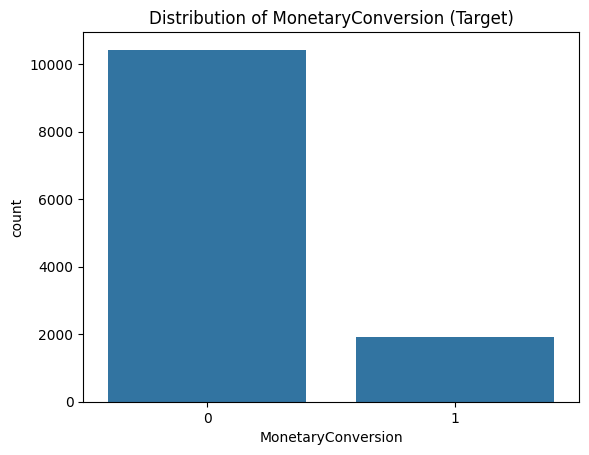

In [64]:
print(df['MonetaryConversion'].value_counts())
sns.countplot(x='MonetaryConversion', data=df)
plt.title("Distribution of MonetaryConversion (Target)")
plt.show()

* The dataset is imbalanced, as there are more instances of class 0 than class 1.

Class 0: 10,422 → ≈ 84%

Class 1: 1,908 → ≈ 16%

This means the model may become biased toward predicting No Conversion, resulting in high accuracy but poor recall for the minority class (1).

* To fix this issue, at the end of this notebook we applied SMOTE (Synthetic Minority Oversampling Technique) for RandomForest

### Boxplots (Detect Outliers)

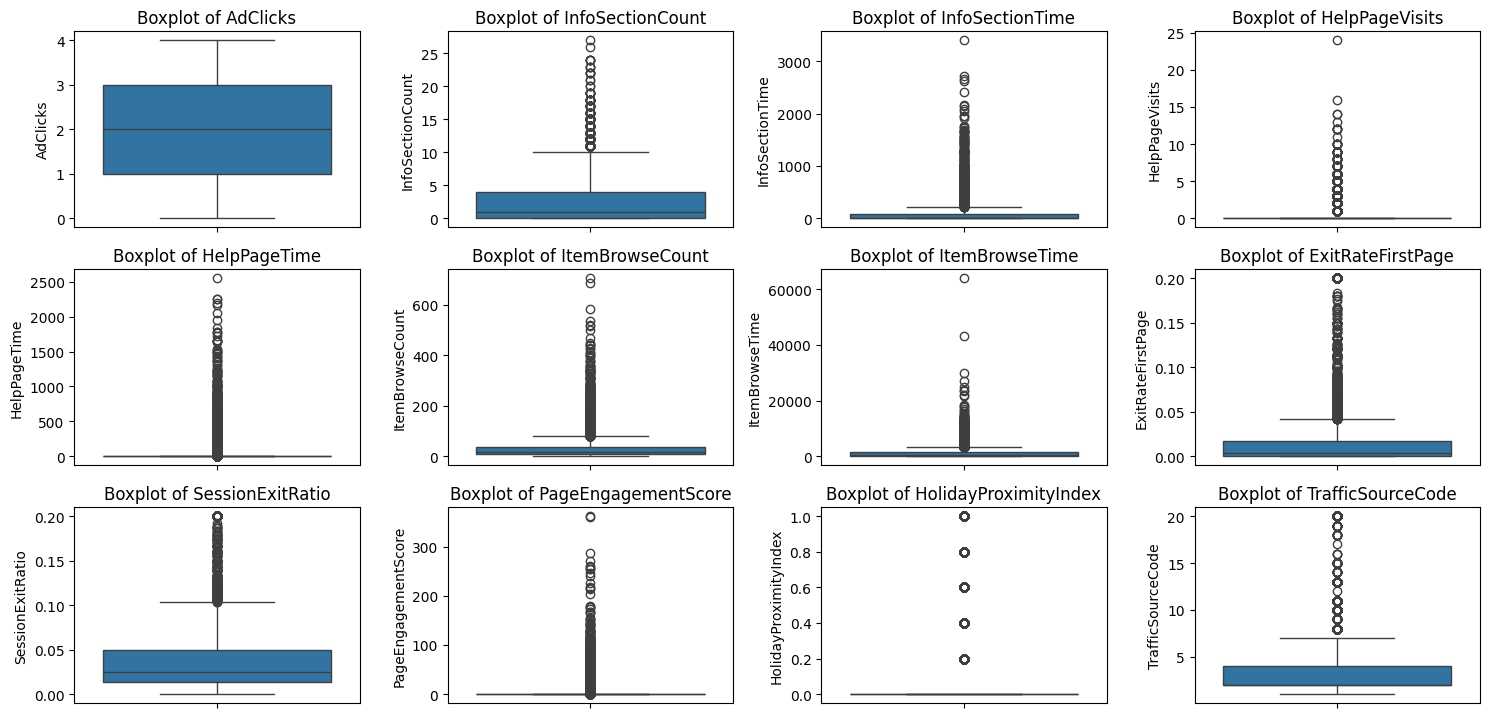

In [65]:
plt.figure(figsize=(15,12))
for i, col in enumerate(num_cols, 1):
    plt.subplot(5,4,i)
    sns.boxplot(y=df[col])
    plt.title(f'Boxplot of {col}')
plt.tight_layout()
plt.show()


### Correlation Matrix 
Visualizes the correlation between all numerical features

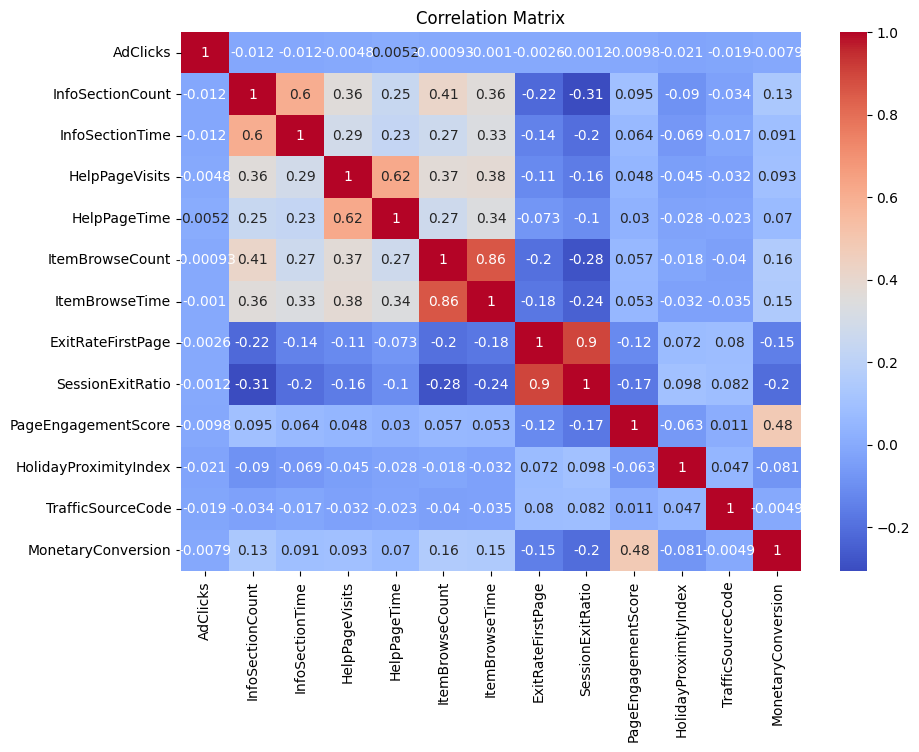

In [66]:
# Select only numerical columns
num_cols = df.select_dtypes(include=['int64', 'float64'])

plt.figure(figsize=(10,7))
sns.heatmap(num_cols.corr(), annot=True, cmap='coolwarm')
plt.title('Correlation Matrix')
plt.show()


### Conversion Rate: Weekend vs Weekday

IsWeekendVisit
False    14.891144
True     17.398884
Name: MonetaryConversion, dtype: float64


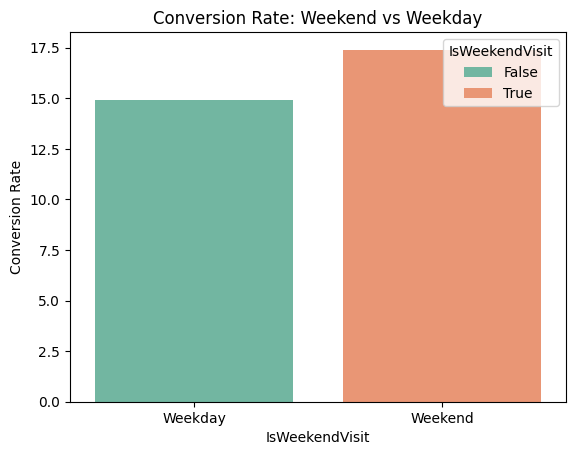

In [67]:
conversion_by_weekend = df.groupby('IsWeekendVisit')['MonetaryConversion'].mean()*100
print(conversion_by_weekend)

sns.barplot(x=conversion_by_weekend.index, y=conversion_by_weekend.values, hue=conversion_by_weekend.index, palette='Set2')
plt.xticks([0,1], ['Weekday', 'Weekend'])
plt.ylabel('Conversion Rate')
plt.title('Conversion Rate: Weekend vs Weekday')
plt.show()


* The conversion rate is slightly higher on weekends (≈17%) compared to weekdays (≈15%).
* users are more likely to make a purchase during weekends,

### Conversion Rate by User Platform

UserPlatformID
2    20.779221
3    18.322296
0    17.265557
4    16.666667
6    14.690409
5    14.285714
1    11.111111
7    10.603589
Name: MonetaryConversion, dtype: float64


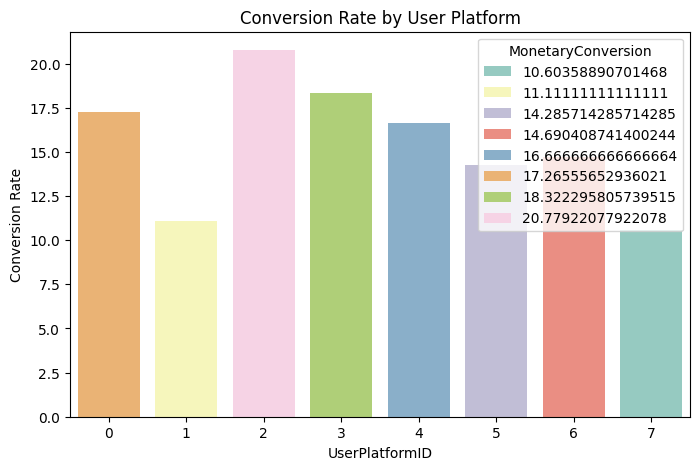

In [68]:
conversion_by_platform = (df.groupby('UserPlatformID')['MonetaryConversion'].mean()*100).sort_values(ascending=False)
print(conversion_by_platform)

plt.figure(figsize=(8,5))
sns.barplot(x=conversion_by_platform.index, y=conversion_by_platform.values,hue=conversion_by_platform, palette='Set3')
plt.title("Conversion Rate by User Platform")
plt.ylabel("Conversion Rate")
plt.show()


In [69]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 12330 entries, 0 to 12329
Data columns (total 26 columns):
 #   Column                      Non-Null Count  Dtype  
---  ------                      --------------  -----  
 0   AdClicks                    12330 non-null  float64
 1   InfoSectionCount            12330 non-null  float64
 2   InfoSectionTime             12330 non-null  float64
 3   HelpPageVisits              12330 non-null  float64
 4   HelpPageTime                12330 non-null  float64
 5   ItemBrowseCount             12330 non-null  float64
 6   ItemBrowseTime              12330 non-null  float64
 7   ExitRateFirstPage           12330 non-null  float64
 8   SessionExitRatio            12330 non-null  float64
 9   PageEngagementScore         12330 non-null  float64
 10  HolidayProximityIndex       12330 non-null  float64
 11  VisitMonth                  12330 non-null  int32  
 12  UserPlatformID              12330 non-null  int32  
 13  WebClientCode               123

## splits the dataset into features (X) and target (y), then separates them into training and testing.

In [70]:
# df = df.drop(['HelpPageVisits','HelpPageTime','AdClicks','UserPlatformID','HolidayProximityIndex','WebClientCode','IsWeekendVisit'], axis=1)
X = df.drop('MonetaryConversion', axis=1)
y = df['MonetaryConversion']

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42, stratify=y)


In [71]:
from imblearn.over_sampling import SMOTE
smote = SMOTE(random_state=42)
X_train, y_train = smote.fit_resample(X_train, y_train)


# 1) Logistic Regression

### i)- Without Standardization

In [72]:
log = LogisticRegression(max_iter=1000, random_state=42)
log.fit(X_train, y_train)
y_pred = log.predict(X_test)

C:\Users\rajpu\AppData\Local\Programs\Python\Python312\Lib\site-packages\sklearn\linear_model\_logistic.py:465: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. OF ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(


In [73]:
print("Accuracy:", accuracy_score(y_test, y_pred))
print("Precision:", precision_score(y_test, y_pred))
print("Recall:", recall_score(y_test, y_pred))
print("F1 Score:", f1_score(y_test, y_pred))
print("Classification Report\n", classification_report(y_test, y_pred))

Accuracy: 0.8041362530413625
Precision: 0.4112478031634446
Recall: 0.612565445026178
F1 Score: 0.4921135646687697
Classification Report
               precision    recall  f1-score   support

           0       0.92      0.84      0.88      2084
           1       0.41      0.61      0.49       382

    accuracy                           0.80      2466
   macro avg       0.67      0.73      0.69      2466
weighted avg       0.84      0.80      0.82      2466



### ii)- With Standardization

In [74]:
scaler = StandardScaler()
X_train_scaled = scaler.fit_transform(X_train)
X_test_scaled = scaler.transform(X_test)

log_reg = LogisticRegression(max_iter=1000, random_state=42)
log_reg.fit(X_train_scaled, y_train)
y_pred_log = log_reg.predict(X_test_scaled)

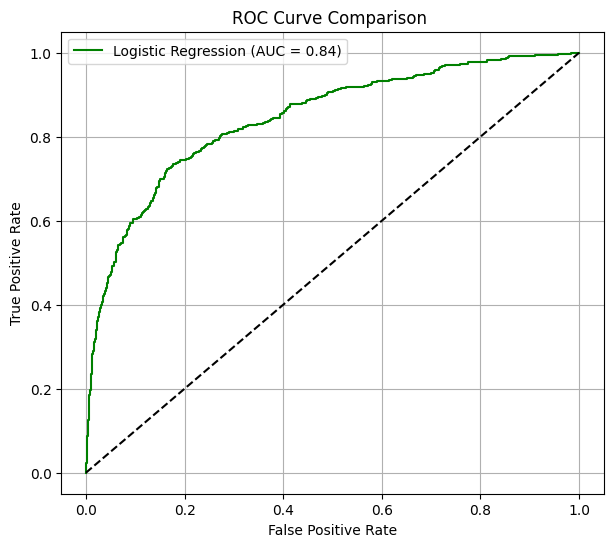

In [94]:
log_prob = log_reg.predict_proba(X_test_scaled)[:, 1]
fpr_log, tpr_log, threshold_rf = roc_curve(y_test, log_prob)

auc_log = auc(fpr_log, tpr_log)

plt.figure(figsize=(7,6))
plt.plot(fpr_log, tpr_log, label=f'Logistic Regression (AUC = {auc_log:.2f})', color='green')
plt.plot([0,1],[0,1],'k--')  # diagonal line
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('ROC Curve Comparison ')
plt.legend()
plt.grid(True)
plt.show()

### Model Evaluation 

In [75]:
print("Accuracy:", accuracy_score(y_test, y_pred_log))
print("Precision:", precision_score(y_test, y_pred_log))
print("Recall:", recall_score(y_test, y_pred_log))
print("F1 Score:", f1_score(y_test, y_pred_log))
print("Classification Report\n", classification_report(y_test, y_pred_log))

Accuracy: 0.8730738037307381
Precision: 0.6116504854368932
Recall: 0.49476439790575916
F1 Score: 0.5470332850940666
Classification Report
               precision    recall  f1-score   support

           0       0.91      0.94      0.93      2084
           1       0.61      0.49      0.55       382

    accuracy                           0.87      2466
   macro avg       0.76      0.72      0.74      2466
weighted avg       0.86      0.87      0.87      2466



### ROC curves and AUC values

C:\Users\rajpu\AppData\Local\Programs\Python\Python312\Lib\site-packages\sklearn\utils\validation.py:2732: UserWarning: X has feature names, but LogisticRegression was fitted without feature names
  warnings.warn(


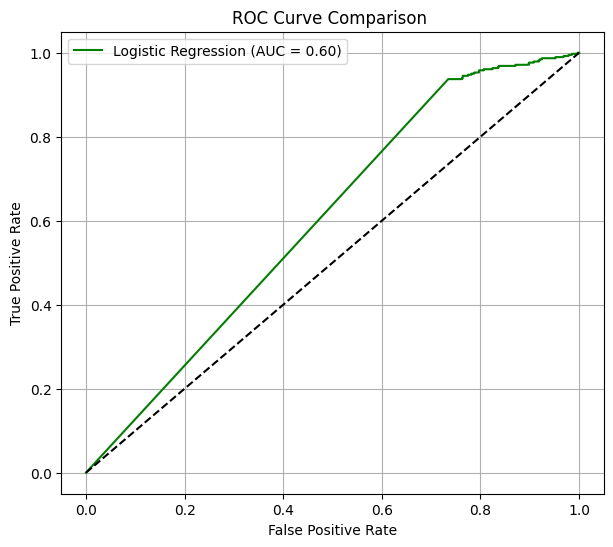

In [76]:
log_prob = log_reg.predict_proba(X_test)[:, 1]
fpr_log, tpr_log, threshold_rf = roc_curve(y_test, log_prob)

auc_log = auc(fpr_log, tpr_log)

plt.figure(figsize=(7,6))
plt.plot(fpr_log, tpr_log, label=f'Logistic Regression (AUC = {auc_log:.2f})', color='green')
plt.plot([0,1],[0,1],'k--')  # diagonal line
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('ROC Curve Comparison ')
plt.legend()
plt.grid(True)
plt.show()

In [77]:
optimal_idx=np.argmax(tpr_log-fpr_log)
optimal_threshold=threshold_rf[optimal_idx]
print(optimal_threshold)

1.0


### confusion_matrix

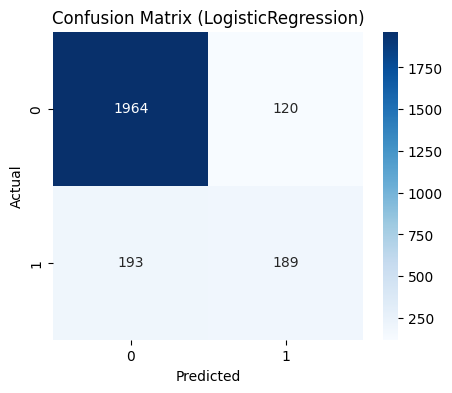

In [78]:
cm = confusion_matrix(y_test, y_pred_log)
plt.figure(figsize=(5,4))
sns.heatmap(cm, annot=True, fmt='d', cmap='Blues')
plt.title("Confusion Matrix (LogisticRegression)")
plt.xlabel("Predicted")
plt.ylabel("Actual")
plt.show()

###  Feature importance 

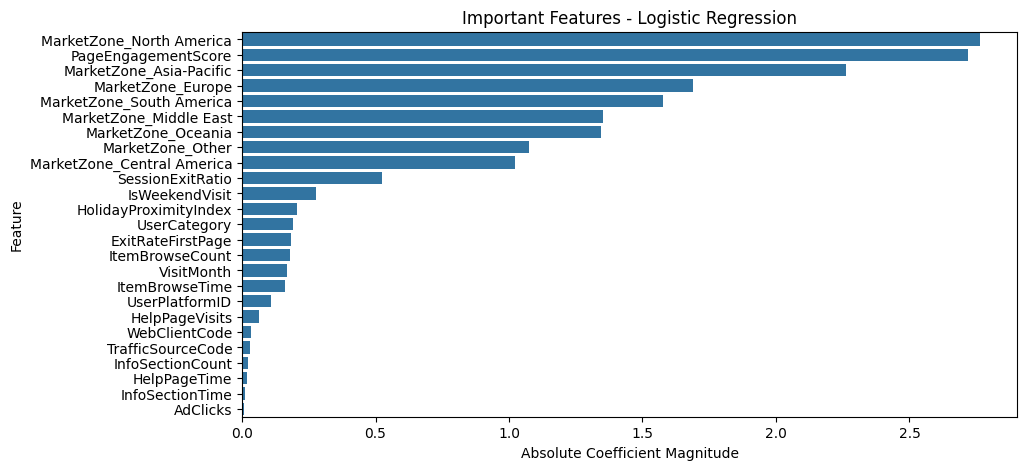

In [79]:
feature_names = X.columns
log_importance = np.abs(log_reg.coef_[0])
log_feat_imp = pd.Series(log_importance, index=feature_names).sort_values(ascending=False)

plt.figure(figsize=(10, 5))
sns.barplot(x=log_feat_imp.values, y=log_feat_imp.index)
plt.title("Important Features - Logistic Regression")
plt.xlabel("Absolute Coefficient Magnitude")
plt.ylabel("Feature")
plt.show()


# 2)- RandomForest 

In [80]:
rf = RandomForestClassifier(n_estimators=200, random_state=42)
rf.fit(X_train, y_train)
y_pred_rf = rf.predict(X_test)


In [81]:
print("Accuracy:", accuracy_score(y_test, y_pred_rf))
print("Precision:", precision_score(y_test, y_pred_rf))
print("Recall:", recall_score(y_test, y_pred_rf))
print("F1 Score:", f1_score(y_test, y_pred_rf))
print("Classification Report\n", classification_report(y_test, y_pred_rf))

Accuracy: 0.8828061638280617
Precision: 0.6177215189873417
Recall: 0.6387434554973822
F1 Score: 0.6280566280566281
Classification Report
               precision    recall  f1-score   support

           0       0.93      0.93      0.93      2084
           1       0.62      0.64      0.63       382

    accuracy                           0.88      2466
   macro avg       0.78      0.78      0.78      2466
weighted avg       0.88      0.88      0.88      2466



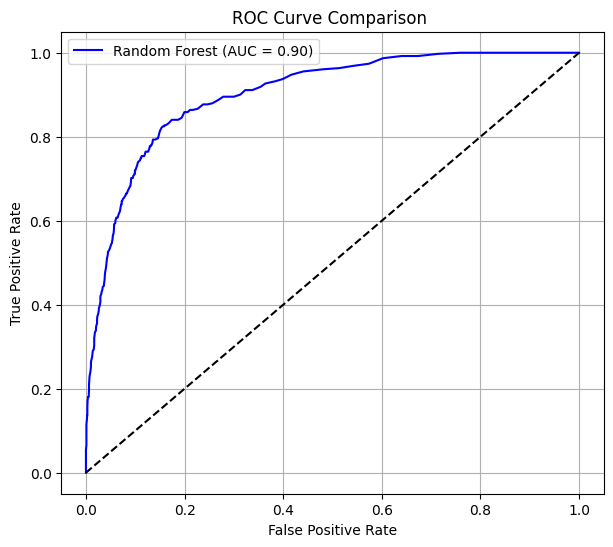

In [82]:
#  Compute ROC curves and AUC values
rf_prob = rf.predict_proba(X_test)[:, 1]
fpr_rf, tpr_rf, threshold_rf = roc_curve(y_test, rf_prob)

auc_rf = auc(fpr_rf, tpr_rf)

plt.figure(figsize=(7,6))
plt.plot(fpr_rf, tpr_rf, label=f'Random Forest (AUC = {auc_rf:.2f})', color='blue')
plt.plot([0,1],[0,1],'k--')  # diagonal line
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('ROC Curve Comparison ')
plt.legend()
plt.grid(True)
plt.show()

In [83]:
optimal_idx=np.argmax(tpr_rf-fpr_rf)
optimal_threshold=threshold_rf[optimal_idx]
print(optimal_threshold)

0.23


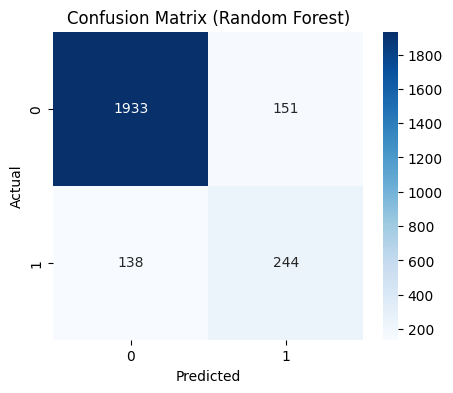

In [84]:
cm = confusion_matrix(y_test, y_pred_rf)
plt.figure(figsize=(5,4))
sns.heatmap(cm, annot=True, fmt='d', cmap='Blues')
plt.title("Confusion Matrix (Random Forest)")
plt.xlabel("Predicted")
plt.ylabel("Actual")
plt.show()

### Feature importance RandomForest

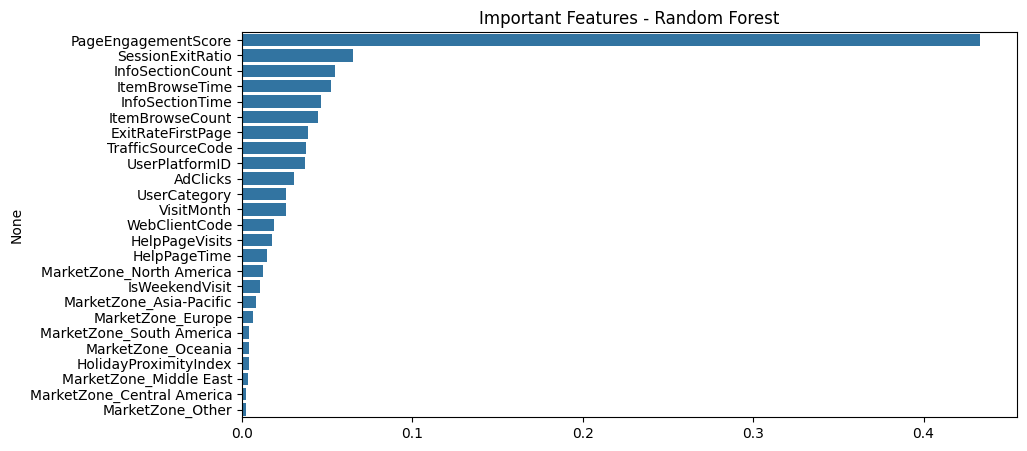

In [85]:
feat_imp = pd.Series(rf.feature_importances_, index=X.columns).sort_values(ascending=False)
plt.figure(figsize=(10, 5))
sns.barplot(x=feat_imp.values, y=feat_imp.index)
plt.title("Important Features - Random Forest")
plt.show()


# 3)- XGBOOST 

In [86]:
xgb = XGBClassifier(eval_metric='logloss', random_state=42)
xgb.fit(X_train, y_train)
y_pred_xgb = xgb.predict(X_test)


In [87]:
print("Accuracy:", accuracy_score(y_test, y_pred_xgb))
print("Precision:", precision_score(y_test, y_pred_xgb))
print("Recall:", recall_score(y_test, y_pred_xgb))
print("F1 Score:", f1_score(y_test, y_pred_xgb))
print("Classification Report\n", classification_report(y_test, y_pred_xgb))

Accuracy: 0.8815896188158961
Precision: 0.6380368098159509
Recall: 0.5445026178010471
F1 Score: 0.5875706214689266
Classification Report
               precision    recall  f1-score   support

           0       0.92      0.94      0.93      2084
           1       0.64      0.54      0.59       382

    accuracy                           0.88      2466
   macro avg       0.78      0.74      0.76      2466
weighted avg       0.88      0.88      0.88      2466



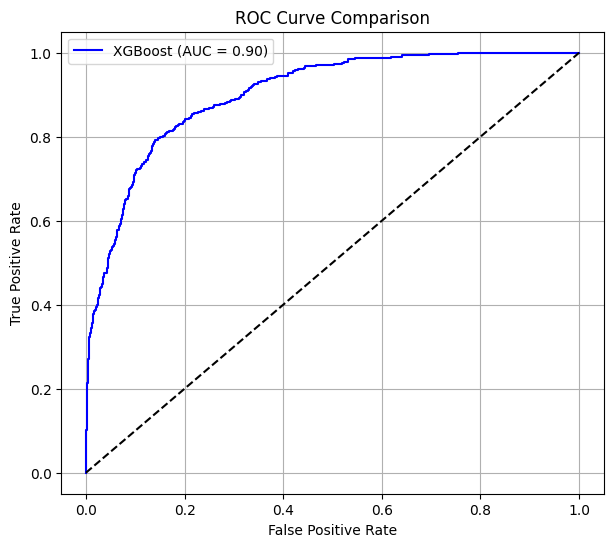

In [88]:
#  Compute ROC curves and AUC values
xgb_prob = xgb.predict_proba(X_test)[:, 1]
fpr_xgb, tpr_xgb,threshold = roc_curve(y_test, xgb_prob)

auc_xgb = auc(fpr_xgb, tpr_xgb)

plt.figure(figsize=(7,6))
plt.plot(fpr_xgb, tpr_xgb, label=f'XGBoost (AUC = {auc_xgb:.2f})', color='blue')
plt.plot([0,1],[0,1],'k--')  # diagonal line
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('ROC Curve Comparison')
plt.legend()
plt.grid(True)
plt.show()

In [89]:
optimal_idx=np.argmax(tpr_xgb-fpr_xgb)
optimal_threshold=threshold[optimal_idx]
print(optimal_threshold)

0.14522585


#  Custome threshold

In [ ]:
y_proba = xgb.predict_proba(X_test)[:, 1]  
y_pred_c = (y_proba >= 0.14522585).astype(int)

print("Accuracy:", accuracy_score(y_test, y_pred_c))
print("Precision:", precision_score(y_test, y_pred_c))
print("Recall:", recall_score(y_test, y_pred_c))
print("F1 Score:", f1_score(y_test, y_pred_c))
print("Classification Report\n", classification_report(y_test, y_pred_c))


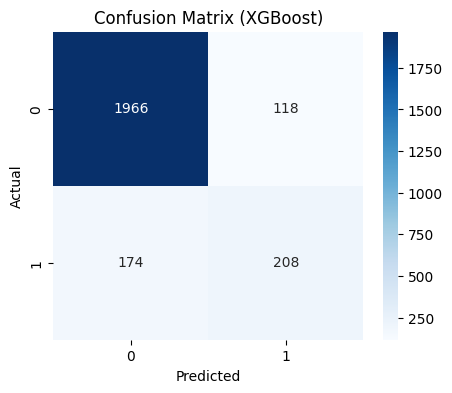

In [90]:
cm = confusion_matrix(y_test, y_pred_xgb)
plt.figure(figsize=(5,4))
sns.heatmap(cm, annot=True, fmt='d', cmap='Blues')
plt.title("Confusion Matrix (XGBoost)")
plt.xlabel("Predicted")
plt.ylabel("Actual")
plt.show()

### Feature importance of XGBoost

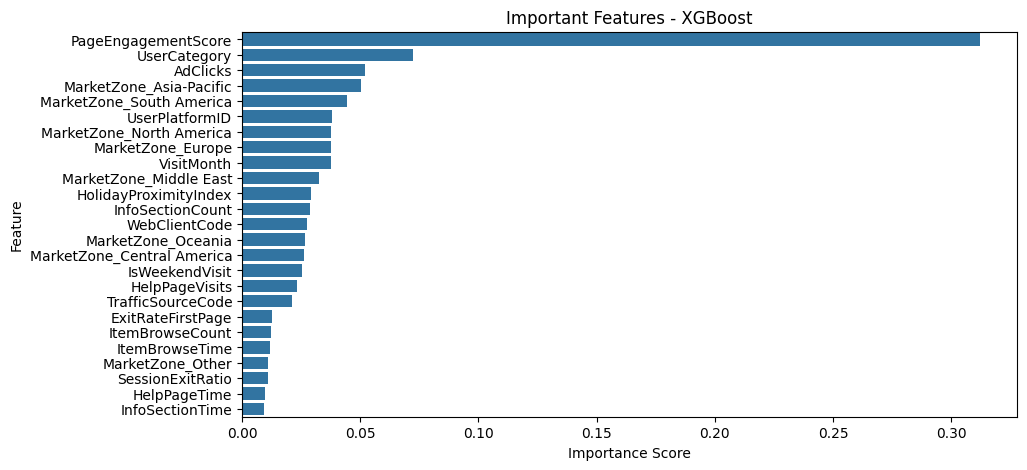

In [91]:
xgb_feat_imp = pd.Series(xgb.feature_importances_, index=feature_names).sort_values(ascending=False)

plt.figure(figsize=(10, 5))
sns.barplot(x=xgb_feat_imp.values, y=xgb_feat_imp.index)
plt.title("Important Features - XGBoost")
plt.xlabel("Importance Score")
plt.ylabel("Feature")
plt.show()


# -------------------- RandomForest WIth SMOOT ---------------------

Accuracy: 0.8828061638280617
F1 Score: 0.6261319534282018
Recall: 0.5445026178010471
F1 Score: 0.5875706214689266

Classification Report:
               precision    recall  f1-score   support

           0       0.93      0.93      0.93      2084
           1       0.62      0.63      0.63       382

    accuracy                           0.88      2466
   macro avg       0.78      0.78      0.78      2466
weighted avg       0.88      0.88      0.88      2466



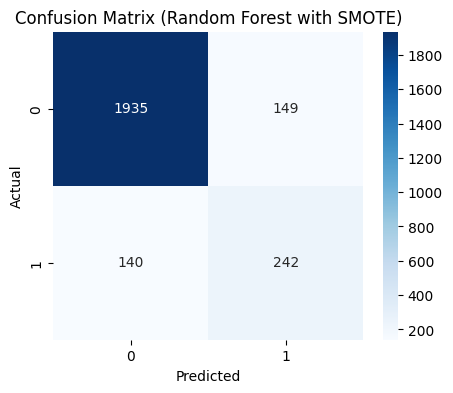

In [97]:
model = RandomForestClassifier(random_state=42)
model.fit(X_train, y_train)

y_pred = model.predict(X_test)
# model_prob = model.predict_proba(X_test)[:, 1]
# y_pred = (model_prob >= 0.28).astype(int)

print("Accuracy:", accuracy_score(y_test, y_pred))
print("F1 Score:", f1_score(y_test, y_pred)) 
print("Recall:", recall_score(y_test, y_pred_xgb))
print("F1 Score:", f1_score(y_test, y_pred_xgb))
print("\nClassification Report:\n", classification_report(y_test, y_pred))


cm = confusion_matrix(y_test, y_pred)
plt.figure(figsize=(5,4))
sns.heatmap(cm, annot=True, fmt='d', cmap='Blues')
plt.title("Confusion Matrix (Random Forest with SMOTE)")
plt.xlabel("Predicted")
plt.ylabel("Actual")
plt.show()

In [99]:
242/(242+149)

0.618925831202046

In [ ]:
# from sklearn.metrics import auc, roc_curve

prob = model.predict_proba(X_test)[:, 1]
fpr, tpr, th = roc_curve(y_test, prob)


auc_value = auc(fpr, tpr)  

plt.figure(figsize=(7,6))
plt.plot(fpr, tpr, label=f'Random Forest (AUC = {auc_value:.2f})', color='blue')
plt.plot([0,1],[0,1],'k--')  
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('ROC Curve')
plt.grid(True)
plt.legend()
plt.show()


* SMOTE helped improve recall the model now identifies more of the minority class (1 → “Yes” conversions).

* Accuracy decreased slightly because the model stopped favoring the majority class.

* F1-score improved a bit, showing better balance between precision and recall.

* Overall, the model became more fair and sensitive to both classes.

SMOTE didn’t drastically change the overall accuracy,
but it enhanced the model’s ability to detect minority class samples,
which is often the main goal in imbalanced classification problems

In [ ]:
optimal_idx=np.argmax(tpr-fpr)
optimal_threshold=th[optimal_idx]
print(optimal_threshold)

| Model | Accuracy | Precision (1) | Recall (1) | F1 (1) |
|--------|-----------|----------------|--------------|---------|
| Logistic regression without standardization | 0.88 | 0.76 | 0.33 | 0.46 |
| Logistic regressionwith standardization | 0.90 | 0.75 | 0.53 | 0.62 |
| Randomforest | 0.90 | 0.75 | 0.53 | 0.62 |
| XGBOOST | 0.89 | 0.69 | 0.58 | 0.63 |
| Randomforest With Smoot and log transformation | 0.88 | 0.63 | 0.58 | 0.63 |


* Model 5 gives the best recall (0.66) — meaning it identifies the most minority cases.

* Models 3 & 4 have the highest F1 (≈ 0.63) with a better balance between precision and recall.

* Catching as many positives as possible (even at some false positives): choose Model 5 (higher recall).

* Balanced performance (less overfitting, stable F1): choose Model 3 or 4.